## Simulate expected misclassification rate

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import multivariate_normal
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_formats = {'retina',}

plt.style.use('seaborn-white')

#### Model to be used for generating data with two classes:
<BR>
$y_i = 0,\quad x_i \sim N_{10}(0, I_{10})$

$y_i = 1,\quad x_i \sim N_{10}(\mu, I_{10})\,$ with $\mu = (1,1,1,1,1,0,0,0,0,0)$

$x_i \in \mathbb{R^{10}}$ normally distributed

$y_i$ equally divided between the two classes (balanced dataset)
<BR>

In [3]:
def simulate_clf_error(clf, train_sample_n=100, test_sample_n=2000):
    
    # _1_ Generate training sample and train classifier
    y_0 = multivariate_normal(mean=np.repeat(0, 10), cov=np.identity(10)).rvs(train_sample_n//2)
    y_1 = multivariate_normal(mean=np.repeat([0,1],5), cov=np.identity(10)).rvs(train_sample_n//2)
    
    X_train = np.r_[y_0, y_1]
    y_train = np.repeat([0,1],50)
        
    clf.fit(X_train, y_train)
        
    # _2_ Generate large set of test data and return error rate of classifier
    y_00 = multivariate_normal(mean=np.repeat(0, 10), cov=np.identity(10)).rvs(test_sample_n//2)
    y_11 = multivariate_normal(mean=np.repeat([0,1],5), cov=np.identity(10)).rvs(test_sample_n//2)
        
    X_test = np.r_[y_00, y_11]
    y_test = np.repeat([0,1], test_sample_n//2)
        
    return(1 - clf.score(X_test, y_test))

#### Run simulations

In [7]:
repeats = 1000
svm_radial = [simulate_clf_error(SVC(kernel='rbf')) for i in np.arange(repeats)]
svm_linear = [simulate_clf_error(SVC(kernel='linear')) for i in np.arange(repeats)]
log_regr = [simulate_clf_error(LogisticRegression(C=100)) for i in np.arange(repeats)]

#### Average error rate

In [8]:
print('SVM - radial kernel: {}'.format(np.mean(svm_radial)))
print('SVM - linear kernel: {}'.format(np.mean(svm_linear)))
print('Logistic regression: {}'.format(np.mean(log_regr)))

SVM - radial kernel: 0.1599925
SVM - linear kernel: 0.16100299999999998
Logistic regression: 0.15938650000000001


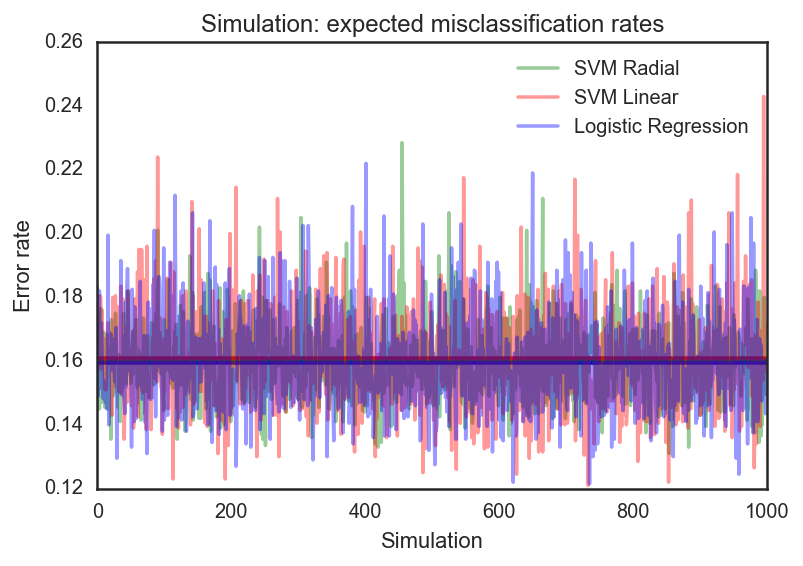

In [9]:
plt.plot(svm_radial, 'g', alpha=0.4, label='SVM Radial')
plt.plot(svm_linear, 'r', alpha=0.4, label='SVM Linear')
plt.plot(log_regr, 'b', alpha=0.4, label='Logistic Regression')
plt.hlines(np.mean(np.c_[svm_radial, svm_linear, log_regr], axis=0), 0, repeats, colors=['g', 'r', 'b'])
plt.xlabel('Simulation')
plt.ylabel('Error rate')
plt.title('Simulation: expected misclassification rates')
plt.legend();

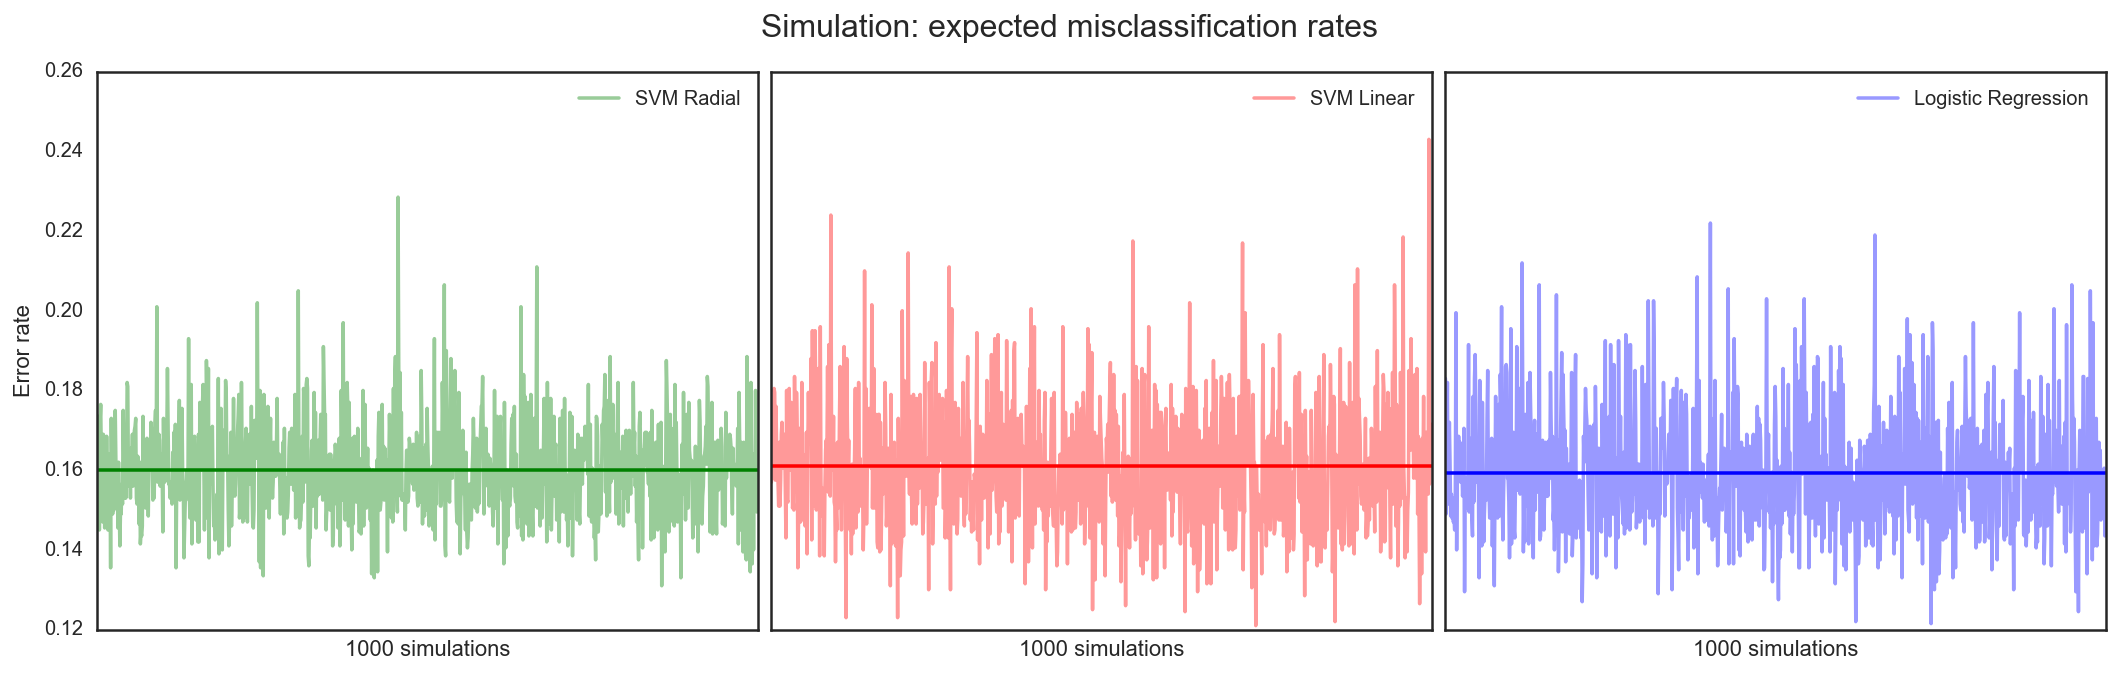

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(18,5))
ax1.plot(svm_radial, 'g', alpha=0.4, label='SVM Radial')
ax1.hlines(np.mean(svm_radial), 0, repeats, colors='g')
ax1.set_ylabel('Error rate')

ax2.plot(svm_linear, 'r', alpha=0.4, label='SVM Linear')
ax2.hlines(np.mean(svm_linear), 0, repeats, colors='r')

ax3.plot(log_regr, 'b', alpha=0.4, label='Logistic Regression')
ax3.hlines(np.mean(log_regr), 0, repeats, colors='b');

fig.suptitle('Simulation: expected misclassification rates', fontsize=16)
fig.subplots_adjust(wspace=0.02)

for ax in fig.axes:
    ax.set_xlabel('{} simulations'.format(repeats))
    ax.tick_params(labelbottom='off')
    ax.legend()